<a href="https://colab.research.google.com/github/TK-Konstantinos/Kiosses.Diabetes/blob/main/IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/kdemertzis/EKPA/raw/main/Data/pcap_data.csv

--2025-03-14 10:17:59--  https://github.com/kdemertzis/EKPA/raw/main/Data/pcap_data.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/pcap_data.csv [following]
--2025-03-14 10:18:00--  https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/pcap_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7302186 (7.0M) [text/plain]
Saving to: ‘pcap_data.csv’

pcap_data.csv       100%[===================>]   6.96M  --.-KB/s    in 0.1s    

2025-03-14 10:18:01 (60.2 MB/s) - ‘pcap_data.csv’ saved [7302186/7302186]



In [2]:
import pandas as pd

# Φόρτωση του CSV αρχείου
df = pd.read_csv("pcap_data.csv")

# Εμφάνιση των πρώτων γραμμών
df.head()

,Avg_syn_flag,Avg_urg_flag,Avg_fin_flag,Avg_ack_flag,Avg_psh_flag,Avg_rst_flag,Avg_DNS_pkt,Avg_TCP_pkt,Avg_UDP_pkt,Avg_ICMP_pkt,...,Min_pkts_lenght,Max_pkts_lenght,StDev_pkts_lenght,Avg_small_payload_pkt,Avg_payload,Min_payload,Max_payload,StDev_payload,Avg_DNS_over_TCP,target
0,-0.230455,4.523595,-1.276876,0.814947,-0.016410,-2.995087,1.063889,-2.371085,-2.840079,-0.283463,...,3.665958,-5.104394,0.690436,-1.584535,-2.282169,-6.064334,-0.756736,-1.488713,0.694093,2.0
1,-2.088776,2.387204,0.338205,1.419440,0.114833,0.913599,0.847367,-0.008734,-1.058475,0.342997,...,9.115390,-1.441248,1.710273,-0.274751,0.349761,8.602419,0.337548,0.362154,1.193261,0.0
2,-0.043220,3.578791,-1.073984,0.313930,-1.774397,-1.006298,0.929811,-3.432328,-1.932374,0.318437,...,-0.061857,-1.210975,0.435881,1.494576,0.074463,-5.532110,-0.088565,0.702886,0.104589,2.0
3,0.065305,3.761012,1.174174,0.761965,0.857883,-0.597540,-0.022305,1.695764,3.305753,0.792997,...,0.742680,-1.267473,-0.327164,0.188910,-0.122022,2.977927,-0.472563,1.779231,-0.058810,1.0
4,3.875263,1.385111,-2.633112,-0.545981,-1.570862,-3.460744,-1.882090,-2.115882,-2.954608,0.986303,...,2.235826,-0.848212,-0.320711,-1.145686,1.356040,-5.251642,0.787477,1.194117,3.840521,1.0


In [3]:
# Έλεγχος για κενές τιμές
print(df.isnull().sum())

# Πληροφορίες για τους τύπους δεδομένων
print(df.info())

Avg_syn_flag             0
Avg_urg_flag             0
Avg_fin_flag             0
Avg_ack_flag             0
Avg_psh_flag             0
Avg_rst_flag             0
Avg_DNS_pkt              0
Avg_TCP_pkt              0
Avg_UDP_pkt              0
Avg_ICMP_pkt             0
Duration_window_flow     0
Avg_delta_time           0
Min_delta_time           0
Max_delta_time           0
StDev_delta_time         0
Avg_pkts_lenght          0
Min_pkts_lenght          0
Max_pkts_lenght          0
StDev_pkts_lenght        0
Avg_small_payload_pkt    0
Avg_payload              0
Min_payload              0
Max_payload              0
StDev_payload            0
Avg_DNS_over_TCP         0
target                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Avg_syn_flag           14967 non-null  float64
 1   Avg_urg_flag   

In [4]:
df = df.dropna()  # Διαγραφή γραμμών με κενά δεδομένα
# ή
df.fillna(0, inplace=True)  # Συμπλήρωση κενών με 0

In [6]:
print(df.columns)

Index(['Avg_syn_flag', 'Avg_urg_flag', 'Avg_fin_flag', 'Avg_ack_flag',
       'Avg_psh_flag', 'Avg_rst_flag', 'Avg_DNS_pkt', 'Avg_TCP_pkt',
       'Avg_UDP_pkt', 'Avg_ICMP_pkt', 'Duration_window_flow', 'Avg_delta_time',
       'Min_delta_time', 'Max_delta_time', 'StDev_delta_time',
       'Avg_pkts_lenght', 'Min_pkts_lenght', 'Max_pkts_lenght',
       'StDev_pkts_lenght', 'Avg_small_payload_pkt', 'Avg_payload',
       'Min_payload', 'Max_payload', 'StDev_payload', 'Avg_DNS_over_TCP',
       'target'],
      dtype='object')


In [9]:
from sklearn.model_selection import train_test_split

# Επιλογή χαρακτηριστικών
X = df.drop(columns=['target'])
y = df['target']

# Διαχωρισμός σε σύνολα εκπαίδευσης και δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Μέγεθος Εκπαίδευσης:", X_train.shape)
print("Μέγεθος Δοκιμής:", X_test.shape)

Μέγεθος Εκπαίδευσης: (11973, 25)
Μέγεθος Δοκιμής: (2994, 25)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Δημιουργία και εκπαίδευση του μοντέλου
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Πρόβλεψη στο σύνολο δοκιμής
y_pred = model.predict(X_test)

# Αξιολόγηση του μοντέλου
print("Ακρίβεια:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Ακρίβεια: 0.9034736138944556
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      1012
         1.0       0.90      0.90      0.90       996
         2.0       0.91      0.92      0.91       986

    accuracy                           0.90      2994
   macro avg       0.90      0.90      0.90      2994
weighted avg       0.90      0.90      0.90      2994



In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Δημιουργία και εκπαίδευση μοντέλου Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Πρόβλεψη στο σύνολο δοκιμής
y_pred_dt = dt_model.predict(X_test)

# Αξιολόγηση απόδοσης
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy (Decision Tree): 0.800935203740815
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      1012
         1.0       0.81      0.82      0.81       996
         2.0       0.80      0.80      0.80       986

    accuracy                           0.80      2994
   macro avg       0.80      0.80      0.80      2994
weighted avg       0.80      0.80      0.80      2994



In [17]:
from sklearn.svm import SVC

# Δημιουργία και εκπαίδευση μοντέλου SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Πρόβλεψη
y_pred_svm = svm_model.predict(X_test)

# Αξιολόγηση
print(" Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

 Accuracy (SVM): 0.8249832999331997
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      1012
         1.0       0.86      0.85      0.85       996
         2.0       0.83      0.84      0.83       986

    accuracy                           0.82      2994
   macro avg       0.83      0.83      0.83      2994
weighted avg       0.82      0.82      0.82      2994



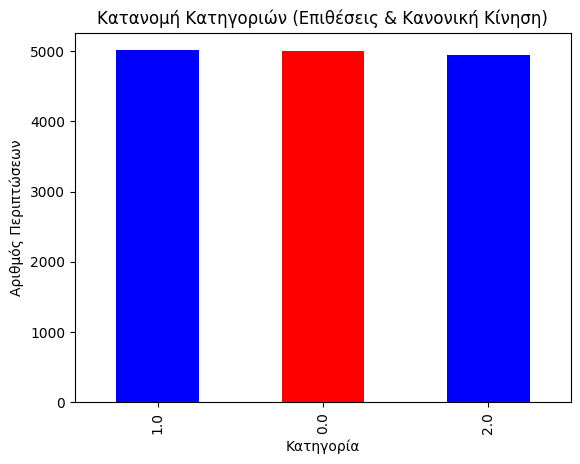

In [14]:
import matplotlib.pyplot as plt

# Οπτικοποίηση της κατανομής των κλάσεων
df['target'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Κατανομή Κατηγοριών (Επιθέσεις & Κανονική Κίνηση)')
plt.xlabel('Κατηγορία')
plt.ylabel('Αριθμός Περιπτώσεων')
plt.show()

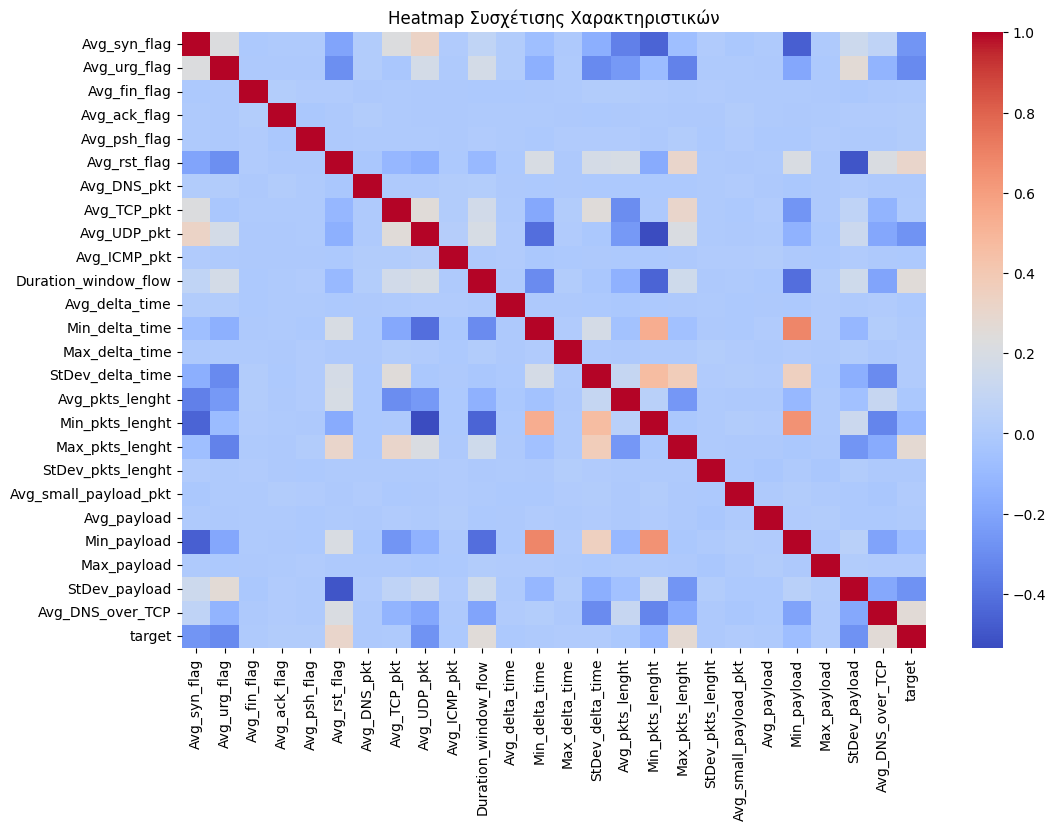

In [15]:
import seaborn as sns

# Υπολογισμός συσχέτισης
correlation_matrix = df.corr()

# Σχεδίαση heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title('Heatmap Συσχέτισης Χαρακτηριστικών')
plt.show()